In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.support.ui import Select
import os
from selenium.common.exceptions import NoSuchElementException
import requests

In [332]:
countries = ['spain','italy','india','germany','uk','belgium','iran']

In [333]:
final=[]
j=0
response = requests.get('https://www.worldometers.info/coronavirus/country/spain/')
text=response.text
text=text[text.find('\'Total Cases\'\n        },\n\n'):]
text=text[text.find('categories:'):]
text=text[text.find('[')+1:]
text=text[:text.find(']')]
main = text.strip('][').split(',')
final.append(main)
for q in countries :
    response = requests.get('https://www.worldometers.info/coronavirus/country/'+q+'/')
    m=response.text
    m=m[m.find('\'Total Cases\'\n        },\n\n'):]
    m=m[m.find('data:'):]
    m=m[m.find('['):]
    m=m[:m.find('responsive:')]
    m=m[:m.find(']')]
#     response = requests.get('https://www.worldometers.info/coronavirus/country/'+q+'/')
#     a=response.text
#     m=a[a.find('data:'):]
#     m=m[:m.find('responsive:')]
#     m=m[m.find('data:')+7:m.find(']')]
    f = m.strip('][').split(',') 
    f = [int(i) for i in f]
    final.append(f)
    j=j+1


In [334]:
countries.insert(0,'date')
countries_data_cases=pd.DataFrame(final)
countries_data_cases
countries_data_cases=countries_data_cases.transpose()
countries_data_cases.columns=countries
countries_data_cases
countries_data_cases.set_index('date',inplace=True)
df=countries_data_cases

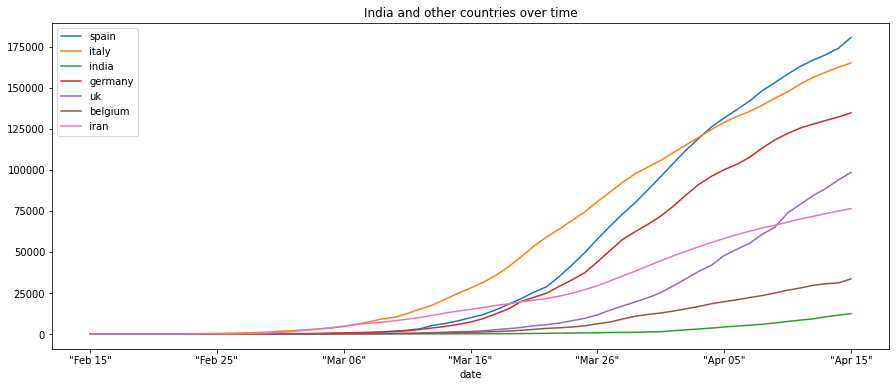

In [335]:
# df=df.astype(float)
df.plot(figsize=(15,6),title='India and other countries over time')

In [336]:
countries.remove('date')
l=[]
j=0
mini = 99999
for i in countries:
    l.append((df[df[i]>5000][i]).tolist())
    

In [337]:
new_data=pd.DataFrame(l)
new_data=new_data.transpose()
new_data.columns = countries

AttributeError: 'Line2D' object has no property 'xlabel'

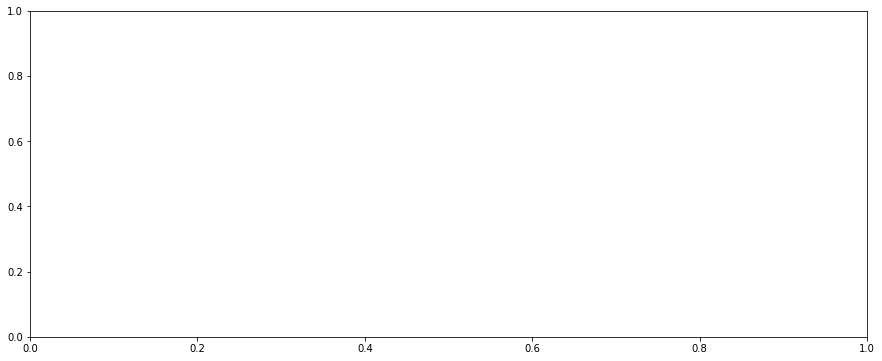

In [340]:
new_data.plot(figsize=(15,6),xlabel='a')

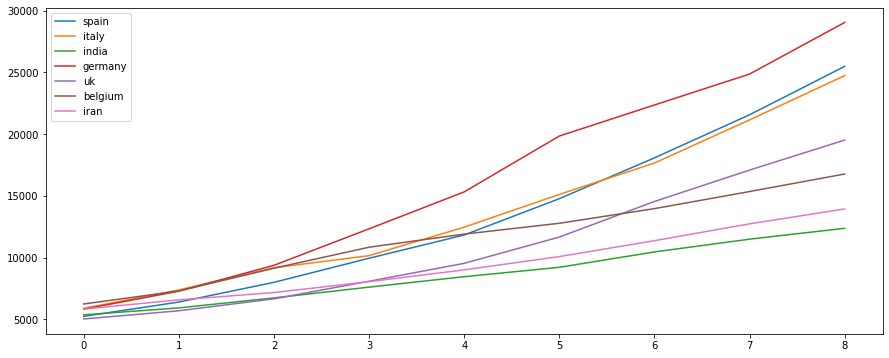

In [339]:
new_data.dropna().plot(figsize=(15,6))